# USA Residential Building Energy Consumption Survey Regression Project
## 미국 주거용 건물 에너지 소비 회귀 분석
- 2015년 미국 EIA RBECS 1억 1,820만 가구를 대표하는 5,600가구
- https://www.kaggle.com/datasets/claytonmiller/2015-residential-energy-consumption-survey

#### feature (759개)

#### targets (1개)
- KWH: 전력 소비량

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# 컬러맵 가져오기
cmap = plt.get_cmap('Pastel1')

# 한글 폰트 경로 설정
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [2]:
import pandas as pd

# 데이터 호출
r_df = pd.read_csv('./datasets/ResidentialBuildingEnergyConsumption.csv', low_memory=False)
r_df

,DOEID,REGIONC,DIVISION,METROMICRO,UATYP10,TYPEHUQ,ZTYPEHUQ,CELLAR,ZCELLAR,BASEFIN,...,ZELAMOUNT,NGXBTU,PERIODNG,ZNGAMOUNT,FOXBTU,PERIODFO,ZFOAMOUNT,LPXBTU,PERIODLP,ZLPAMOUNT
0,10001,4,10,METRO,U,2,0,0,0,-2,...,0,103.32,1,0,137.45,-2,-2,91.33,-2,-2
1,10002,3,7,NONE,R,2,0,0,0,-2,...,1,NaN,-2,-2,137.45,-2,-2,91.33,-2,-2
2,10003,3,6,METRO,U,2,0,1,0,1,...,0,100.14,1,0,137.45,-2,-2,91.33,-2,-2
3,10004,2,4,MICRO,C,2,0,1,0,1,...,0,NaN,-2,-2,137.45,-2,-2,91.33,2,0
4,10005,1,2,METRO,U,2,0,1,0,0,...,0,102.83,1,0,137.45,-2,-2,91.33,-2,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5681,15682,2,3,METRO,U,5,0,-2,-2,-2,...,1,102.40,5,1,137.45,-2,-2,91.33,-2,-2
5682,15683,3,6,MICRO,C,2,0,0,0,-2,...,0,99.34,1,0,137.45,-2,-2,91.33,-2,-2
5683,15684,2,3,METRO,U,5,0,-2,-2,-2,...,0,NaN,-2,-2,137.45,-2,-2,91.33,-2,-2
5684,15685,3,7,METRO,R,2,0,0,0,-2,...,0,NaN,-2,-2,137.45,-2,-2,91.33,-2,-2


### Ⅰ. 데이터 탐색

In [3]:
# 데이터 정보 확인
r_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5686 entries, 0 to 5685
Columns: 759 entries, DOEID to ZLPAMOUNT
dtypes: float64(262), int64(493), object(4)
memory usage: 32.9+ MB


In [4]:
# 데이터 크기 확인
r_df.shape

(5686, 759)

In [5]:
r_df.columns

Index(['DOEID', 'REGIONC', 'DIVISION', 'METROMICRO', 'UATYP10', 'TYPEHUQ',
       'ZTYPEHUQ', 'CELLAR', 'ZCELLAR', 'BASEFIN',
       ...
       'ZELAMOUNT', 'NGXBTU', 'PERIODNG', 'ZNGAMOUNT', 'FOXBTU', 'PERIODFO',
       'ZFOAMOUNT', 'LPXBTU', 'PERIODLP', 'ZLPAMOUNT'],
      dtype='object', length=759)

### Ⅱ. 데이터 전처리

In [6]:
# 데이터 프레임 복제
pre_r_df = r_df.copy()

In [7]:
# 결측치 확인
pre_r_df.isna().sum().sum()

2382

In [8]:
# 결측치 제거
pre_r_df = pre_r_df[~pre_r_df.isna().any(axis=1)].reset_index(drop=True)
pre_r_df

,DOEID,REGIONC,DIVISION,METROMICRO,UATYP10,TYPEHUQ,ZTYPEHUQ,CELLAR,ZCELLAR,BASEFIN,...,ZELAMOUNT,NGXBTU,PERIODNG,ZNGAMOUNT,FOXBTU,PERIODFO,ZFOAMOUNT,LPXBTU,PERIODLP,ZLPAMOUNT
0,10001,4,10,METRO,U,2,0,0,0,-2,...,0,103.32,1,0,137.45,-2,-2,91.33,-2,-2
1,10003,3,6,METRO,U,2,0,1,0,1,...,0,100.14,1,0,137.45,-2,-2,91.33,-2,-2
2,10005,1,2,METRO,U,2,0,1,0,0,...,0,102.83,1,0,137.45,-2,-2,91.33,-2,-2
3,10007,3,5,METRO,U,4,0,-2,-2,-2,...,0,102.79,1,0,137.45,-2,-2,91.33,-2,-2
4,10008,2,3,METRO,R,2,0,1,0,1,...,0,101.53,1,0,137.45,-2,-2,91.33,-2,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3299,15674,1,2,METRO,U,2,0,1,0,1,...,0,98.69,1,0,137.45,-2,-2,91.33,-2,-2
3300,15675,4,8,MICRO,C,2,0,1,0,1,...,0,89.69,1,0,137.45,-2,-2,91.33,-2,-2
3301,15679,2,3,METRO,U,2,0,0,0,-2,...,0,100.23,1,0,137.45,-2,-2,91.33,-2,-2
3302,15682,2,3,METRO,U,5,0,-2,-2,-2,...,1,102.40,5,1,137.45,-2,-2,91.33,-2,-2


In [9]:
# null 값 확인
pre_r_df.isnull().sum().sum()

0

In [10]:
# 중복행 확인
pre_r_df.duplicated().sum()

0

In [11]:
# 불필요한 피처 제거
pre_r_df = pre_r_df.drop(labels='DOEID', axis=1)
pre_r_df

,REGIONC,DIVISION,METROMICRO,UATYP10,TYPEHUQ,ZTYPEHUQ,CELLAR,ZCELLAR,BASEFIN,ZBASEFIN,...,ZELAMOUNT,NGXBTU,PERIODNG,ZNGAMOUNT,FOXBTU,PERIODFO,ZFOAMOUNT,LPXBTU,PERIODLP,ZLPAMOUNT
0,4,10,METRO,U,2,0,0,0,-2,-2,...,0,103.32,1,0,137.45,-2,-2,91.33,-2,-2
1,3,6,METRO,U,2,0,1,0,1,0,...,0,100.14,1,0,137.45,-2,-2,91.33,-2,-2
2,1,2,METRO,U,2,0,1,0,0,0,...,0,102.83,1,0,137.45,-2,-2,91.33,-2,-2
3,3,5,METRO,U,4,0,-2,-2,-2,-2,...,0,102.79,1,0,137.45,-2,-2,91.33,-2,-2
4,2,3,METRO,R,2,0,1,0,1,0,...,0,101.53,1,0,137.45,-2,-2,91.33,-2,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3299,1,2,METRO,U,2,0,1,0,1,0,...,0,98.69,1,0,137.45,-2,-2,91.33,-2,-2
3300,4,8,MICRO,C,2,0,1,0,1,0,...,0,89.69,1,0,137.45,-2,-2,91.33,-2,-2
3301,2,3,METRO,U,2,0,0,0,-2,-2,...,0,100.23,1,0,137.45,-2,-2,91.33,-2,-2
3302,2,3,METRO,U,5,0,-2,-2,-2,-2,...,1,102.40,5,1,137.45,-2,-2,91.33,-2,-2


In [12]:
# 오브젝트 형태를 띄는 열 찾기
object_columns = pre_r_df.select_dtypes(include=['object']).columns
object_columns

Index(['METROMICRO', 'UATYP10', 'CLIMATE_REGION_PUB', 'IECC_CLIMATE_PUB'], dtype='object')

In [13]:
# object 컬럼의 고유 값 확인
columns = ['METROMICRO', 'UATYP10', 'CLIMATE_REGION_PUB', 'IECC_CLIMATE_PUB']

for column in columns:
    print(pre_r_df[column].unique())

['METRO' 'NONE' 'MICRO']
['U' 'R' 'C']
['Hot-Dry/Mixed-Dry' 'Mixed-Humid' 'Cold/Very Cold' 'Hot-Humid' 'Marine']
['3B-4B' '3A' '5A' '6A-6B' '4A' '1A-2A' '5B-5C' '4C' '3C' '2B'
 '7A-7B-7AK-8AK']


In [14]:
from sklearn.preprocessing import LabelEncoder

# 데이터 프레임 복제
enc_r_df = pre_r_df.copy()
encoders = {}

# 문자열 컬럼 추출
columns = columns = ['METROMICRO', 'UATYP10', 'CLIMATE_REGION_PUB', 'IECC_CLIMATE_PUB']

# 반복하여 컬럼 인코딩 처리:
for column in columns:
    # 레이블인코더 객체 생성
    encoder = LabelEncoder()
    # 문자열 데이터 정수로 형변환
    result = encoder.fit_transform(enc_r_df[column])
    # 형변환 값으로 대체
    enc_r_df[column] = result
    # 원본 데이터 담기
    encoders[column] = encoder.classes_

encoders

{'METROMICRO': array(['METRO', 'MICRO', 'NONE'], dtype=object),
 'UATYP10': array(['C', 'R', 'U'], dtype=object),
 'CLIMATE_REGION_PUB': array(['Cold/Very Cold', 'Hot-Dry/Mixed-Dry', 'Hot-Humid', 'Marine',
        'Mixed-Humid'], dtype=object),
 'IECC_CLIMATE_PUB': array(['1A-2A', '2B', '3A', '3B-4B', '3C', '4A', '4C', '5A', '5B-5C',
        '6A-6B', '7A-7B-7AK-8AK'], dtype=object)}

In [15]:
enc_r_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3304 entries, 0 to 3303
Columns: 758 entries, REGIONC to ZLPAMOUNT
dtypes: float64(262), int32(4), int64(492)
memory usage: 19.1 MB


In [16]:
# 타겟 컬럼 위치 변경을 위해 새로운 컬럼에 데이터 담기
enc_r_df['target'] = enc_r_df.TOTALDOL
# 기존 컬럼은 제거
enc_r_df = enc_r_df.drop(labels='TOTALDOL', axis=1)

In [17]:
enc_r_df

,REGIONC,DIVISION,METROMICRO,UATYP10,TYPEHUQ,ZTYPEHUQ,CELLAR,ZCELLAR,BASEFIN,ZBASEFIN,...,NGXBTU,PERIODNG,ZNGAMOUNT,FOXBTU,PERIODFO,ZFOAMOUNT,LPXBTU,PERIODLP,ZLPAMOUNT,target
0,4,10,0,2,2,0,0,0,-2,-2,...,103.32,1,0,137.45,-2,-2,91.33,-2,-2,1406.10
1,3,6,0,2,2,0,1,0,1,0,...,100.14,1,0,137.45,-2,-2,91.33,-2,-2,2828.84
2,1,2,0,2,2,0,1,0,0,0,...,102.83,1,0,137.45,-2,-2,91.33,-2,-2,910.89
3,3,5,0,2,4,0,-2,-2,-2,-2,...,102.79,1,0,137.45,-2,-2,91.33,-2,-2,1015.17
4,2,3,0,1,2,0,1,0,1,0,...,101.53,1,0,137.45,-2,-2,91.33,-2,-2,2384.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3299,1,2,0,2,2,0,1,0,1,0,...,98.69,1,0,137.45,-2,-2,91.33,-2,-2,7560.36
3300,4,8,1,0,2,0,1,0,1,0,...,89.69,1,0,137.45,-2,-2,91.33,-2,-2,1533.87
3301,2,3,0,2,2,0,0,0,-2,-2,...,100.23,1,0,137.45,-2,-2,91.33,-2,-2,1483.97
3302,2,3,0,2,5,0,-2,-2,-2,-2,...,102.40,5,1,137.45,-2,-2,91.33,-2,-2,514.00


In [18]:
# 타겟 데이터 이상치 제거
from sklearn.preprocessing import StandardScaler

# 표준화 객체 생성
std = StandardScaler()
# 데이터 표준화 변환
result = std.fit_transform(enc_r_df)
# 표준화 데이터 프레임 생성
std_r_df = pd.DataFrame(result, columns=enc_r_df.columns)

for column in std_r_df.columns:
    # 타겟 데이터 이상치 제거
    copy_std_r_df = std_r_df[std_r_df[column].between(-1.96, 1.96)]

# 이상치 제거후 유지되는 인덱스를 대조하여 원본 데이터 이상치 제거
enc_r_df = enc_r_df.iloc[copy_std_r_df.index].reset_index(drop=True)
enc_r_df

,REGIONC,DIVISION,METROMICRO,UATYP10,TYPEHUQ,ZTYPEHUQ,CELLAR,ZCELLAR,BASEFIN,ZBASEFIN,...,NGXBTU,PERIODNG,ZNGAMOUNT,FOXBTU,PERIODFO,ZFOAMOUNT,LPXBTU,PERIODLP,ZLPAMOUNT,target
0,4,10,0,2,2,0,0,0,-2,-2,...,103.32,1,0,137.45,-2,-2,91.33,-2,-2,1406.10
1,3,6,0,2,2,0,1,0,1,0,...,100.14,1,0,137.45,-2,-2,91.33,-2,-2,2828.84
2,1,2,0,2,2,0,1,0,0,0,...,102.83,1,0,137.45,-2,-2,91.33,-2,-2,910.89
3,3,5,0,2,4,0,-2,-2,-2,-2,...,102.79,1,0,137.45,-2,-2,91.33,-2,-2,1015.17
4,2,3,0,1,2,0,1,0,1,0,...,101.53,1,0,137.45,-2,-2,91.33,-2,-2,2384.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3178,1,2,0,2,4,0,-2,-2,-2,-2,...,106.30,5,1,137.45,-2,-2,91.33,-2,-2,1835.00
3179,4,8,1,0,2,0,1,0,1,0,...,89.69,1,0,137.45,-2,-2,91.33,-2,-2,1533.87
3180,2,3,0,2,2,0,0,0,-2,-2,...,100.23,1,0,137.45,-2,-2,91.33,-2,-2,1483.97
3181,2,3,0,2,5,0,-2,-2,-2,-2,...,102.40,5,1,137.45,-2,-2,91.33,-2,-2,514.00


<Axes: >

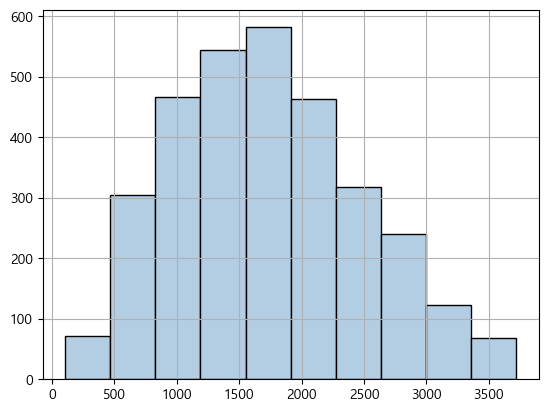

In [19]:
# 타겟 컬럼 분포 확인
enc_r_df.target.hist(color=cmap(np.array([1])), edgecolor='black')

### Ⅲ. 분석

### 🌟 1Cycle

In [20]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, R2: {:.4f}'\
         .format(MSE, RMSE, R2))

#### 📊 선형 회귀

In [21]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# 데이터 세트 분리
# 피처, 타겟 데이터 분리
features, targets = enc_r_df.iloc[:, :-1], enc_r_df.iloc[:, -1]

# 학습/테스트 및 문제/정답 데이터 세트 분리
X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

# 선형 회귀 모델
l_r = LinearRegression()
# 훈련
l_r.fit(X_train, y_train)

LinearRegression()

In [22]:
# 예측
prediction = l_r.predict(X_test)
# 평가
get_evaluation(y_test, prediction)

MSE: 0.0001, RMSE: 0.0076, R2: 1.0000


#### 📊 회귀 모델

In [23]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split

# 데이터 세트 분리
# 피처, 타겟 데이터 분리
features, targets = enc_r_df.iloc[:, :-1], enc_r_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

# 회귀 모델 담기
dt_r = DecisionTreeRegressor(random_state=124)
rf_r = RandomForestRegressor(random_state=124, n_estimators=1000)
gb_r = GradientBoostingRegressor(random_state=124)
xgb_r = XGBRegressor(random_state=124)
lgb_r = LGBMRegressor(random_state=124)

models = [dt_r, rf_r, gb_r, xgb_r, lgb_r]

# 모델 별 학습 진행:
for model in models:
    # 모델 학습
    model.fit(X_train, y_train)
    # 예측
    prediction = model.predict(X_test)
    # 모델명 출력 (모델명과 평가 결과가 같이 출력되도록)
    print(model.__class__.__name__)
    # 평가
    get_evaluation(y_test, prediction)

DecisionTreeRegressor
MSE: 13872.4954, RMSE: 117.7816, R2: 0.9749
RandomForestRegressor
MSE: 6587.4638, RMSE: 81.1632, R2: 0.9881
GradientBoostingRegressor
MSE: 4343.4458, RMSE: 65.9048, R2: 0.9921
XGBRegressor
MSE: 6526.5997, RMSE: 80.7874, R2: 0.9882
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.121013 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 55334
[LightGBM] [Info] Number of data points in the train set: 2546, number of used features: 687
[LightGBM] [Info] Start training from score 1735.867627
LGBMRegressor
MSE: 3771.3507, RMSE: 61.4113, R2: 0.9932


In [24]:
from statsmodels.api import OLS

# 데이터 세트 분리
# 피처, 타겟 데이터 분리
features, targets = enc_r_df.iloc[:, :-1], enc_r_df.iloc[:, -1]

# 객체 생성
model = OLS(targets, features)
# 훈련 및 정보 출력
print(model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.371e+11
Date:                Tue, 14 May 2024   Prob (F-statistic):               0.00
Time:                        17:12:10   Log-Likelihood:                 13292.
No. Observations:                3183   AIC:                        -2.513e+04
Df Residuals:                    2458   BIC:                        -2.074e+04
Df Model:                         724                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
REGIONC               -0.0008      0

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features, i) for i in range(features.shape[1])]
    vif['features'] = features.columns
    return vif

In [26]:
# 다중 공산성 확인
get_vif(features)

C:\Users\LEGION\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\LEGION\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\LEGION\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,vif_score,features
0,2.860831e+01,REGIONC
1,4.178948e+01,DIVISION
2,3.320208e+00,METROMICRO
3,3.186884e+00,UATYP10
4,3.177967e+01,TYPEHUQ
...,...,...
752,1.676803e+04,PERIODFO
753,3.984072e+04,ZFOAMOUNT
754,6.732120e-16,LPXBTU
755,1.766118e+14,PERIODLP


In [27]:
enc_r_df.corr()['target'].sort_values(ascending=False)[1:]

DOLLAREL    0.898700
KWH         0.780221
BTUEL       0.780221
TOTALBTU    0.765770
DOLLARNG    0.635643
              ...   
BTULPCDR         NaN
DOLLPCDR         NaN
ELXBTU           NaN
FOXBTU           NaN
LPXBTU           NaN
Name: target, Length: 757, dtype: float64

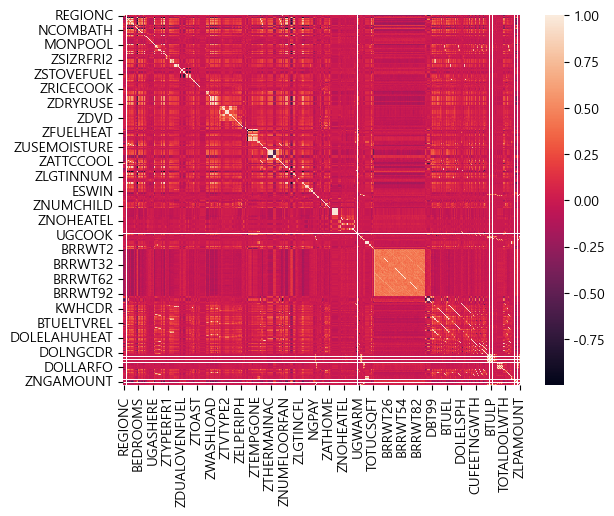

In [28]:
import seaborn as sns

sns.heatmap(features.corr())
plt.show()

#### 📊 시각화

In [29]:
cycle1_data = {
    'model': ['선형회귀', '회귀모델(lgbm_r)'],
    'R2': [1.0000, 0.9932],
}

cycle1 = pd.DataFrame(cycle1_data)

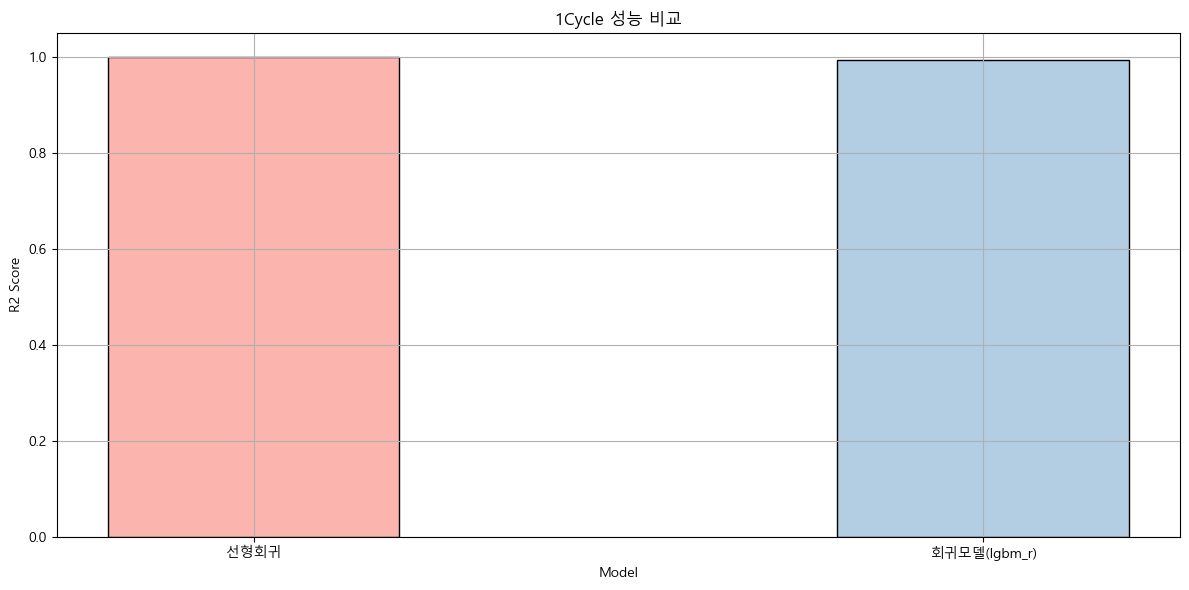

,model,R2
0,선형회귀,1.0000
1,회귀모델(lgbm_r),0.9932


In [30]:
import matplotlib.pyplot as plt
import numpy as np

# 그래프 그리기
plt.figure(figsize=(12, 6))

# 컬러맵 가져오기
cmap = plt.get_cmap('Pastel1')

plt.bar(cycle1['model'], cycle1['R2'], color=cmap(np.array([0, 1, 2])), edgecolor='black', width=0.4)
plt.title('1Cycle 성능 비교')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.grid(True)

# # y축의 범위 지정
# plt.ylim(0.45, 0.95)

plt.tight_layout()
plt.show()

display(cycle1)

#### 🚩 1Cycle 결과
- 선형 회귀  
**MSE: 0.0001, RMSE: 0.0076, R2: 1.0000**

- 회귀 모델(LGBMRegressor)  
**MSE: 3771.3507, RMSE: 61.4113, R2: 0.9932**

#### 💡 분석
- 회귀 분석 결과가 모두 1에 가깝게 나타났으나,  
  모델 평가 지표 확인 시 다중 공산성 등 다양한 수치들에 문제가 있는 것으로 보여져 적합하지 않은 모델이라 판단됨.
- 해당 문제를 해결하기 위해 차원 축소 진행 후 성능 평가를 확인하고자 함.